# Summary statistics of clinically relevant benchmarks (19.05.2021)

In [322]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [323]:
DATASETS = 'annotated-datasets.csv'

In [324]:
datasets_df = pd.read_csv(DATASETS,  lineterminator='\n', na_values='')
datasets_df = datasets_df.fillna('')
datasets_df.head()

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
0,Heart Disease Data Set,Classification of Coronary Artery Disease,Image classification,https://identifiers.org/ito:ITO_01160,Clinical notes / EHR data,Yes,Not described,No,Public,Not stated,...,,,http://arxiv.org/abs/1812.02828v1,https://archive.ics.uci.edu/ml/datasets/Heart+...,,,English,,,\r
1,"""Clinical data set"": contains three corpora: p...",Classifying documents as relevant or irrelevan...,Text Classification,https://identifiers.org/ito:ITO_01150,Biomedical scientfic literature,Yes,"Certainty, Uncertainty, AUC,",No,On request,Not stated,...,Not relevant,,https://pubmed.ncbi.nlm.nih.gov/24954015,,,,English,,,\r
2,Arizona Disease Corpus (AZDC),Information extraction,Information Extraction,https://identifiers.org/ito:ITO_00705,Biomedical scientfic literature,Yes,Not described,Not described,Public,Not stated,...,Indirectly,,https://pubmed.ncbi.nlm.nih.gov/25817970,http://diego.asu.edu/index.php?downloads=yes,,2009,English,,,\r
3,20 disease articles of twitter data,Not applicable,,,Social media data,No,Not applicable,No,Unknown,,...,,,https://arxiv.org/abs/1711.04305,,,,English,,,\r
4,2011 MetaMapped Medline Baseline,Not applicable,,,Biomedical scientfic literature,No,Not applicable,No,Unknown,,...,,,https://pubmed.ncbi.nlm.nih.gov/22195220,,,,English,,,\r


### Total number of datasets

In [325]:
print('Total number of datasets: {0}'.format(datasets_df.shape[0]))

Total number of datasets: 474


In [326]:
nlp_datasets_df = datasets_df[(datasets_df['Relevant for QA/IR?'] == 'Directly') |(datasets_df['Relevant for QA/IR?'] == 'Indirectly')]

In [327]:
print('Total number of datasets relevant for NLP: {0}'.format(nlp_datasets_df.shape[0]))

Total number of datasets relevant for NLP: 337


### Only benchmarks (= publicly available and has evaluation criteria)

In [328]:
# Filter for evaluation criteria
benchmarks_df = nlp_datasets_df[nlp_datasets_df['Has evaluation criteria?']!='No']
# Filter for availabiluity
benchmarks_df = benchmarks_df[benchmarks_df['Accessibility']!='Unknown']
benchmarks_df = benchmarks_df[benchmarks_df['Accessibility']!='Not available']

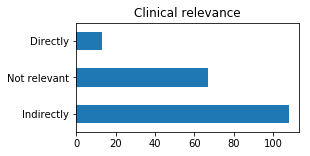

In [329]:
benchmarks_df['Clinical relevance'].value_counts().plot.barh(title='Clinical relevance', figsize=(4,2))

### Top 10 tasks of directly relevant benchmarks

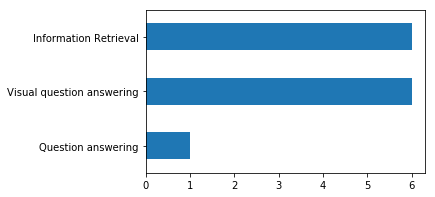

In [330]:
directly_relevant_df = benchmarks_df.loc[benchmarks_df['Clinical relevance'] == 'Directly']
tasks_directly_relevant = directly_relevant_df['Mapped task'].value_counts().sort_values()[-10:].plot.barh(figsize=(5,3)) 

tasks_directly_relevant.figure.savefig('tasks_directly_relevant.png', bbox_inches='tight', dpi=300)

In [331]:
directly_relevant_df

,Name (or description if no name available),Task,Mapped task,Id(s) of mapped task,Data basis,Has evaluation criteria?,Metrics,Data splits,Accessibility,Data license,...,Clinical relevance,Primary target group of task,Link: Source publication(s),Link: Main reference,Link: Dataset,First time published,Language,Comment,Normalised task,Aliases\r
24,TREC CDS task 2016,Finding relevant literature,Information Retrieval,https://identifiers.org/ito:ITO_01431,Biomedical scientfic literature,Yes,"infNDCG (inferred NDCG), infAP (inferred avera...",Not described,Public,Not stated,...,Directly,Clinicians,http://arxiv.org/abs/1801.09322v1,https://trec.nist.gov/data/clinical.html,http://www.biocreative.org/resources/corpora/b...,2016,English,,,CDS'2016\r
25,TREC CDS task 2015,Finding relevant literature,Information Retrieval,https://identifiers.org/ito:ITO_01431,Biomedical scientfic literature,Yes,"infNDCG (inferred NDCG), infAP (inferred avera...",Not described,Public,Not stated,...,Directly,Clinicians,http://arxiv.org/abs/1801.09322v1,https://trec.nist.gov/data/clinical.html,http://www.biocreative.org/resources/corpora/b...,2016,English,,,CDS'2016\r
26,TREC CDS task 2014,Finding relevant literature,Information Retrieval,https://identifiers.org/ito:ITO_01431,Biomedical scientfic literature,Yes,"infNDCG (inferred NDCG), infAP (inferred avera...",Not described,Public,Not stated,...,Directly,Clinicians,http://arxiv.org/abs/1801.09322v1,https://trec.nist.gov/data/clinical.html,http://www.biocreative.org/resources/corpora/b...,2016,English,,,CDS'2016\r
34,Dataset based on 56 real life diagnostic cases,Search engine for rare diseases,Information Retrieval,https://identifiers.org/ito:ITO_01431,Biomedical scientfic literature,Yes,"Rank 1st rel, @10, @20",No,Public,Not stated,...,Directly,Clinicians,http://dx.doi.org/10.1016/j.ijmedinf.2013.01.005,https://arxiv.org/pdf/1303.3229.pdf,,,English,,,\r
270,PathVQA,Visual question answering,Visual question answering,https://identifiers.org/ito:ITO_00499,Histology images,Yes,BLEU,Official,Public,Not stated,...,Directly,Pathologists,http://arxiv.org/abs/2010.12435v1,,,,English,,,\r
288,VQA-RAD,Visual question answering,Visual question answering,https://identifiers.org/ito:ITO_00499,Radiology images,Yes,BLEU,No,Public,CC0 1.0 Universal,...,Directly,Radiologists,https://www.nature.com/articles/sdata2018251,https://www.nature.com/articles/sdata2018251,https://osf.io/89kps/,2018,English,,,\r
300,emrQA based on i2b2 datasets,Question Answering on Electronic Medical Records,Question answering,https://identifiers.org/ito:ITO_00491,Clinical notes / EHR data,Yes,"EM, F-score",Official,Upon registration,n2c2 NLP Data Use Agreement,...,Directly,Clinicians,http://arxiv.org/abs/1809.00732v1,https://github.com/panushri25/emrQA,,,English,,,emrQA (based on i2b2)\r
319,ImageCLEFmedical 2018 Visual Question Answerin...,Visual Question Answering (VQA),Visual question answering,https://identifiers.org/ito:ITO_00499,Medical images,Yes,"BLEU, WBSS (Word-based Semantic Similarity), C...",Official,Upon registration,Not stated,...,Directly,Clinicians,https://www.imageclef.org/,https://www.imageclef.org/2018/VQA-Med,,2018,English,,,ImageCLEF-VQA-Med 18; ImageCLEFmedical: VQA\r
323,ImageCLEFmedical 2019 Visual Question Answerin...,Visual Question Answering (VQA),Visual question answering,https://identifiers.org/ito:ITO_00499,Radiology images; Clinical question-answer pairs,Yes,,Official,Upon registration,Not stated,...,Directly,Clinicians,https://www.imageclef.org//,https://www.imageclef.org/2019/medical/vqa/,https://github.com/abachaa/VQA-Med-2019,2019,English,,,\r
337,ImageCLEFmedical 2020 Visual Question Answerin...,Visual Question Answering (VQA),Visual question answering,https://identifiers.org/ito:ITO_00499,Radiology images; Clinical question-answer pairs,Yes,"Accuracy (Strict), BLEU",Official,Upon registration,Not stated,...,Directly,Clinicians,https://www.imageclef.org/,https://www.imageclef.org/2020/medical/vqa/,https://githu

### Top 10 tasks of indirectly relevant benchmarks

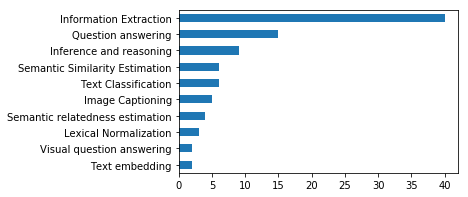

In [332]:
indirectly_relevant_df = benchmarks_df.loc[benchmarks_df['Clinical relevance'] == 'Indirectly']
tasks_indirectly_relevant = indirectly_relevant_df['Mapped task'].value_counts().sort_values()[-10:].plot.barh(figsize=(5,3))

tasks_indirectly_relevant.figure.savefig('tasks_indirectly_relevant.png', bbox_inches='tight', dpi=300)

### Source data type

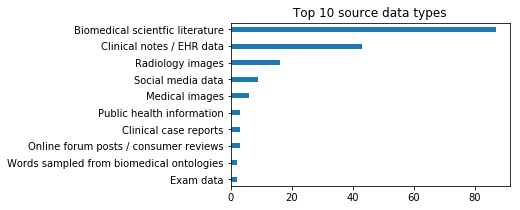

In [333]:
benchmarks_df['Data basis'] = benchmarks_df['Data basis'].str.split(';', expand=True)
df = pd.get_dummies(benchmarks_df['Data basis']).sum()

df = df.sort_values()[-10:]
source_data_types_plot = df.plot.barh(width=0.3, figsize=(5,3), title='Top 10 source data types')
source_data_types_plot.figure.savefig('source_data_types_plot.jpg', bbox_inches='tight', dpi=300)

In [334]:
datasets_df['Clinical relevance'].value_counts()
benchmarks_df['Clinical relevance'].value_counts()

Indirectly      108
Not relevant     67
Directly         13
Name: Clinical relevance, dtype: int64

In [335]:
# Non-benchmarks
non_benchmarks_df = nlp_datasets_df.loc[(datasets_df['Has evaluation criteria?']=='No') | 
                       (datasets_df['Accessibility']=='Unknown') |      
                        (datasets_df['Accessibility']=='Not available')]
non_benchmarks_df['Clinical relevance'].value_counts()


Indirectly      110
Not relevant     29
Directly         10
Name: Clinical relevance, dtype: int64

                                Non-benchmark datasets  Benchmarks
Indirectly clinically relevant                     110         108
Not clinically relevant                             29          67
Directly clinically relevant                        10          13


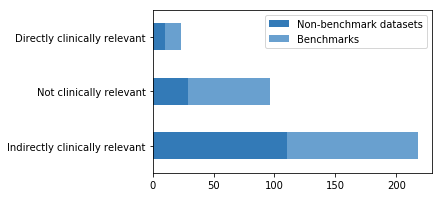

In [336]:
overview_df = pd.concat([non_benchmarks_df['Clinical relevance'].value_counts(), benchmarks_df['Clinical relevance'].value_counts()],  axis=1, keys=['Non-benchmark datasets', 'Benchmarks'])
overview_df.index = ['Indirectly clinically relevant', 'Not clinically relevant', 'Directly clinically relevant']
print(overview_df)
overview_fig = overview_df.plot.barh(stacked=True, figsize=(5,3), color=['#337AB7', '#69a0cf'])
overview_fig.figure.savefig('overview_df.png', bbox_inches='tight', dpi=300)